# Model Training

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_addons as tfa

from tqdm import tqdm
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from tensorflow.keras.optimizers import Adam

### Read Processed Data

In [85]:
listings_df = pd.read_csv('../data/processed/processed_listings.csv').dropna()
print('Number of listings: ' + str(len(listings_df)))

Number of listings: 127605


In [86]:
listings_df.head()

,subtype,style,living_area,lot_dimensions,bedrooms,bathrooms,levels,location,listing_year,age,yard_area,listing_date,year_of_construction,price
0,2 Storey,2 storey,1191,4076,3,1,2,Quebec City,2020,16,2885,2020-12-01,2004,332500
1,Bungalow,Open area,1261,9500,2,1,1,Portneuf,2021,64,8239,2021-12-01,1957,265000
2,Townhouse,Unknown,1645,1360,3,1,3,Mercier,2021,15,0,2021-11-01,2006,612000
3,Bi-generation,Link,2024,17000,4,3,1,Stoneham-et-Tewkesbury,2021,2,14976,2021-12-01,2019,526500
4,Semi-detached,2 storey,2400,4471,4,2,2,Gatineau,2021,32,2071,2021-12-01,1989,360000


### Choosing columnns

In [87]:
ordinal_cols = []
one_hot_cols = ['subtype', 'location']
numerical_cols = ['living_area', 'lot_dimensions', 'bedrooms', 'bathrooms', 'levels', 'age', 'listing_year', 'year_of_construction']
target_col = ['price']

In [88]:
listings_df = listings_df[ordinal_cols + one_hot_cols + numerical_cols + target_col]
listings_df.head()

,subtype,location,living_area,lot_dimensions,bedrooms,bathrooms,levels,age,listing_year,year_of_construction,price
0,2 Storey,Quebec City,1191,4076,3,1,2,16,2020,2004,332500
1,Bungalow,Portneuf,1261,9500,2,1,1,64,2021,1957,265000
2,Townhouse,Mercier,1645,1360,3,1,3,15,2021,2006,612000
3,Bi-generation,Stoneham-et-Tewkesbury,2024,17000,4,3,1,2,2021,2019,526500
4,Semi-detached,Gatineau,2400,4471,4,2,2,32,2021,1989,360000


### One Hot Encoding

In [89]:
def oh_encode(df_line, col, new_col, val):
    if df_line[col] == val:
        return df_line[new_col] + 1
    else:
        return df_line[new_col]

for col in one_hot_cols:
    for val in tqdm(listings_df[col].unique()):   
        new_col = str(val) + '_' + col
        listings_df[new_col] = 0
        listings_df[new_col] = listings_df.apply(oh_encode, args=(col, new_col, val), axis=1)

    listings_df = listings_df.drop(columns=[col])

100%|██████████| 129/129 [02:33<00:00,  1.19s/it]


In [90]:
listings_df.head()

,living_area,lot_dimensions,bedrooms,bathrooms,levels,age,listing_year,year_of_construction,price,2 Storey_subtype,...,Le Sud-Ouest_location,Verdun_location,Beaconsfield_location,Chibougamau_location,Notre-Dame-de-l'Île-Perrot_location,Saint-Léonard_location,Mont-Royal_location,Griffintown_location,Westmount_location,Îles Laval_location
0,1191,4076,3,1,2,16,2020,2004,332500,1,...,0,0,0,0,0,0,0,0,0,0
1,1261,9500,2,1,1,64,2021,1957,265000,0,...,0,0,0,0,0,0,0,0,0,0
2,1645,1360,3,1,3,15,2021,2006,612000,0,...,0,0,0,0,0,0,0,0,0,0
3,2024,17000,4,3,1,2,2021,2019,526500,0,...,0,0,0,0,0,0,0,0,0,0
4,2400,4471,4,2,2,32,2021,1989,360000,0,...,0,0,0,0,0,0,0,0,0,0


### Ordinal Encoding

In [91]:
ordinal_encoders = {}

for col in ordinal_cols:
    ordinal_encoders[col] = OrdinalEncoder()
    ordinal_encoders[col].fit(listings_df[[col]])
    listings_df[col] = ordinal_encoders[col].transform(listings_df[[col]])

listings_df.head()

,living_area,lot_dimensions,bedrooms,bathrooms,levels,age,listing_year,year_of_construction,price,2 Storey_subtype,...,Le Sud-Ouest_location,Verdun_location,Beaconsfield_location,Chibougamau_location,Notre-Dame-de-l'Île-Perrot_location,Saint-Léonard_location,Mont-Royal_location,Griffintown_location,Westmount_location,Îles Laval_location
0,1191,4076,3,1,2,16,2020,2004,332500,1,...,0,0,0,0,0,0,0,0,0,0
1,1261,9500,2,1,1,64,2021,1957,265000,0,...,0,0,0,0,0,0,0,0,0,0
2,1645,1360,3,1,3,15,2021,2006,612000,0,...,0,0,0,0,0,0,0,0,0,0
3,2024,17000,4,3,1,2,2021,2019,526500,0,...,0,0,0,0,0,0,0,0,0,0
4,2400,4471,4,2,2,32,2021,1989,360000,0,...,0,0,0,0,0,0,0,0,0,0


### Split Data (Test/Train)

In [92]:
y = listings_df[target_col]
X = listings_df.drop(columns=target_col)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Scale Data
Using Min Max Scaler

In [93]:
scaled_cols = numerical_cols + ordinal_cols

scalers = {}

for col in scaled_cols:
    scalers[col] = MinMaxScaler()
    X_train[col] = scalers[col].fit_transform(X_train[[col]])
    X_test[col] = scalers[col].transform(X_test[[col]])

In [94]:
scale_target = True

if scale_target:
    target_scaler = MinMaxScaler()

    y_train = target_scaler.fit_transform(y_train)
    y_test = target_scaler.fit_transform(y_test)

X_train.head()

,living_area,lot_dimensions,bedrooms,bathrooms,levels,age,listing_year,year_of_construction,2 Storey_subtype,Bungalow_subtype,...,Le Sud-Ouest_location,Verdun_location,Beaconsfield_location,Chibougamau_location,Notre-Dame-de-l'Île-Perrot_location,Saint-Léonard_location,Mont-Royal_location,Griffintown_location,Westmount_location,Îles Laval_location
85809,0.542857,0.149033,0.500000,0.25,0.333333,0.101266,1.000000,0.900312,0,0,...,0,0,0,0,0,0,0,0,0,0
8531,0.190000,0.226067,0.166667,0.00,0.000000,0.012658,0.944444,0.984424,0,1,...,0,0,0,0,0,0,0,0,0,0
52468,0.285714,0.400000,0.333333,0.25,0.333333,0.072785,0.555556,0.903427,1,0,...,0,0,0,0,0,0,0,0,0,0
76421,0.131429,0.205233,0.333333,0.25,0.000000,0.098101,1.000000,0.903427,0,1,...,0,0,0,0,0,0,0,0,0,0
84775,0.219143,0.336667,0.500000,0.25,0.000000,0.145570,1.000000,0.856698,0,0,...,0,0,0,0,0,0,0,0,0,0


## Neural Network Training

In [95]:
model = Sequential()
model.add(Dense(units=10, activation='tanh', input_shape=(X_train.shape[-1],)))
model.add(Dense(units=5, activation='tanh'))
model.add(Dense(units=1, activation='linear'))

print(model.summary())

model.compile(optimizer=Adam(lr=0.001), loss='mse')

history = model.fit(X_train, y_train, batch_size=500, epochs=200, shuffle=True, verbose=1, validation_data=(X_test, y_test))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                1470      
                                                                 
 dense_36 (Dense)            (None, 5)                 55        
                                                                 
 dense_37 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,531
Trainable params: 1,531
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200


c:\Users\simka\Documents\GitHub\quebec-real-estate\venv\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


205/205 [==============================] - 0s 1ms/step - loss: 0.0075 - val_loss: 0.0048
Epoch 2/200
205/205 [==============================] - 0s 1ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 3/200
205/205 [==============================] - 0s 1ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 4/200
205/205 [==============================] - 0s 995us/step - loss: 0.0042 - val_loss: 0.0041
Epoch 5/200
205/205 [==============================] - 0s 1ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 6/200
205/205 [==============================] - 0s 995us/step - loss: 0.0039 - val_loss: 0.0039
Epoch 7/200
205/205 [==============================] - 0s 1ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 8/200
205/205 [==============================] - 0s 995us/step - loss: 0.0037 - val_loss: 0.0038
Epoch 9/200
205/205 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 10/200
205/205 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 0.

In [96]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

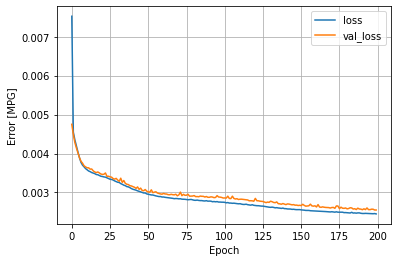

In [97]:
plot_loss(history)

In [98]:
predicted_prices = target_scaler.inverse_transform(model.predict(X_test))
real_prices = target_scaler.inverse_transform(y_test)

In [99]:
test_df = X_test.copy()

for col in scaled_cols:
    test_df[col] = scalers[col].inverse_transform(test_df[[col]])

for col in ordinal_cols:
    test_df[col] = ordinal_encoders[col].inverse_transform(test_df[[col]])

In [100]:
d = {}
d['real price'] = list(real_prices)
d['predicted price'] = list(predicted_prices)

test_df['real price'] = d['real price']
test_df['predicted price'] = d['predicted price']

test_df['real price'] = test_df['real price'].astype(int)
test_df['predicted price'] = test_df['predicted price'].astype(int)

In [101]:
test_df.head(12)

,living_area,lot_dimensions,bedrooms,bathrooms,levels,age,listing_year,year_of_construction,2 Storey_subtype,Bungalow_subtype,...,Beaconsfield_location,Chibougamau_location,Notre-Dame-de-l'Île-Perrot_location,Saint-Léonard_location,Mont-Royal_location,Griffintown_location,Westmount_location,Îles Laval_location,real price,predicted price
126097,1100.0,2037.0,2.0,1.0,1.0,70.0,2010.0,1940.0,0,0,...,0,0,0,0,0,0,0,0,178000,186864
60608,1344.0,4100.0,4.0,1.0,2.0,88.0,2011.0,1923.0,1,0,...,0,0,0,0,0,0,0,0,372500,288627
125540,846.0,7800.0,1.0,1.0,1.0,6.0,2010.0,2004.0,0,0,...,0,0,0,0,0,0,0,0,186000,250553
74177,1645.0,1360.0,3.0,1.0,3.0,15.0,2021.0,2006.0,0,0,...,0,0,0,0,0,0,0,0,612000,610645
12,1120.0,16000.0,3.0,2.0,1.0,11.0,2021.0,2010.0,0,1,...,0,0,0,0,0,0,0,0,263800,310286
63467,1040.0,3712.0,2.0,1.0,2.0,18.0,2010.0,1992.0,0,0,...,0,0,0,0,0,0,0,0,207000,225843
70383,1568.0,7200.0,4.0,2.0,2.0,23.0,2006.0,1983.0,1,0,...,0,0,0,0,0,0,0,0,164000,223579
78696,1261.0,9500.0,2.0,1.0,1.0,64.0,2021.0,1957.0,0,1,...,0,0,0,0,0,0,0,0,265000,264614
101159,960.0,6157.0,3.0,2.0,1.0,31.0,2021.0,1990.0,0,1,...,0,0,0,0,0,0,0,0,400000,405013
35036,1285.0,4040.0,3.0,1.0,2.0,9.0,2017.0,2008.0,0,0,...,0,0,0,0,0,0,0,0,285000,276907


In [102]:
errors = abs(predicted_prices - real_prices)
errors_small = list(filter(lambda x: x < 100000, errors))
errors_pct = 100 * (abs(predicted_prices - real_prices) / real_prices)
errors_pct_small = list(filter(lambda x: x < 100, errors_pct))

In [103]:
e_avg = int(np.mean(errors))
e_std = int(np.std(errors))
epct_avg = round(np.mean(errors_pct), 2)
epct_std = round(np.std(errors_pct), 2)

print('Error Mean ($): ' + str(e_avg) + '$')
print('Error std ($): ' + str(e_std) + '$')
print('Error Mean (%): ' + str(epct_avg) + '%')
print('Error std (%): ' + str(epct_std) + '%')

Error Mean ($): 29630$
Error std ($): 40103$
Error Mean (%): 11.21%
Error std (%): 17.9%
